
# Day 14 of My 100 Days of AI/ML Challenge

## Focus: Model Evaluation & Cross-Validation Techniques

Model evaluation ensures that our machine learning models are **robust, generalizable, and trustworthy**.  
Today, we'll explore techniques like **train/test splits**, **cross-validation**, and **evaluation metrics** that help us assess how well our models perform on unseen data.



## Key Concepts

### 1. Train/Test Split
Divide your dataset into **training** and **testing** subsets to evaluate model performance on unseen data.

### 2. Cross-Validation (CV)
Cross-validation is a robust method for estimating model performance using multiple folds of data.

- **K-Fold CV:** Split data into K parts, train on K-1, test on 1, and rotate.  
- **Stratified K-Fold:** Maintains class balance for classification tasks.  
- **Leave-One-Out CV (LOOCV):** Uses all but one data point for training, tests on the remaining.

### 3. Evaluation Metrics
Key metrics vary depending on the problem type:

- **Classification:** Accuracy, Precision, Recall, F1-Score, ROC-AUC, Confusion Matrix.  
- **Regression:** MAE, MSE, RMSE, R² Score.

### 4. Model Selection and Hyperparameter Tuning
Use **GridSearchCV** or **RandomizedSearchCV** to combine cross-validation with hyperparameter optimization.


In [1]:

# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

print(f"Data shape: {X.shape}")
print(f"Target classes: {np.unique(y)}")


Data shape: (150, 4)
Target classes: [0 1 2]


In [2]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [3]:

# Apply K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean CV Accuracy: 0.9733333333333334


In [4]:

# Stratified K-Fold preserves class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
strat_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

print("Stratified K-Fold Scores:", strat_scores)
print("Mean Stratified CV Accuracy:", np.mean(strat_scores))


Stratified K-Fold Scores: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean Stratified CV Accuracy: 0.9666666666666668


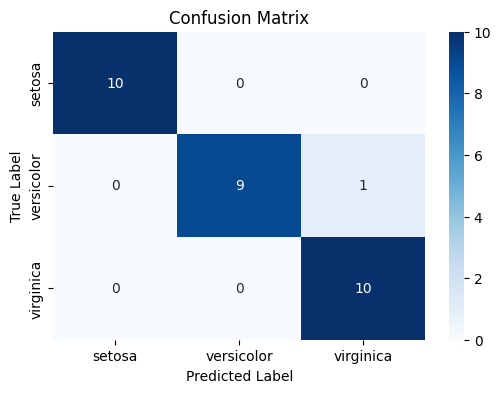

In [5]:

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [6]:

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)
print("Test Accuracy with Best Model:", grid.score(X_test, y_test))


Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.9666666666666668
Test Accuracy with Best Model: 0.9666666666666667



## Key Takeaway

Model evaluation isn't just about metrics — it's about **building trust** in your models.  
Cross-validation and proper performance metrics ensure that your model performs well not just on your dataset, but in the real world too.  

